In [22]:
import pandas as pd
from math import sqrt
from scipy.stats import norm, t
import matplotlib.pyplot as plt
from numpy import corrcoef

In [23]:
datafile = "../../dataset/ch18/dexterity.txt"
data = pd.read_csv(datafile, sep='\t')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age(months)    68 non-null     float64
 1   Gender         93 non-null     object 
 2   Dominant Hand  93 non-null     object 
 3   Dominant       93 non-null     float64
 4   non-dominant   93 non-null     float64
 5   Dominant.1     93 non-null     float64
 6   Non-dominant   93 non-null     float64
 7   Differences    93 non-null     float64
dtypes: float64(6), object(2)
memory usage: 5.9+ KB


In [5]:
data.head()

,Age(months),Gender,Dominant Hand,Dominant,non-dominant,Dominant.1,Non-dominant,Differences
0,117.0,male,right,0.022085,0.013515,0.353357,0.216245,0.137111
1,101.0,male,right,0.016075,0.021468,0.257193,0.343495,-0.086302
2,135.0,male,right,0.033535,0.031085,0.536553,0.497358,0.039195
3,119.0,male,right,0.027732,0.031008,0.443705,0.496124,-0.052419
4,124.0,female,right,0.030175,0.024254,0.482800,0.388067,0.094733


In [6]:
domhand = data['Dominant.1']
nonhand = data['Non-dominant']

In [9]:
corrcoef(domhand, nonhand)

array([[1.        , 0.52122655],
       [0.52122655, 1.        ]])

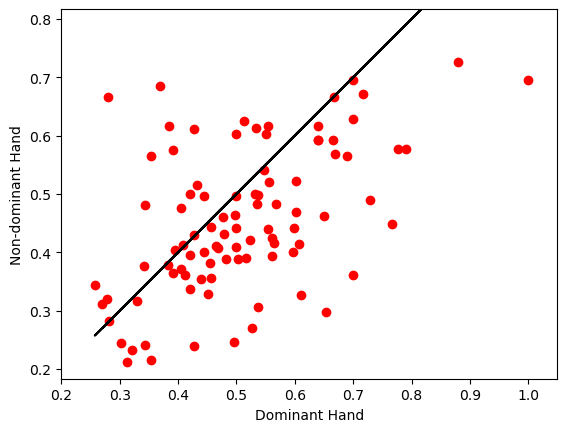

In [21]:
plt.plot(domhand, nonhand, 'ro');
plt.plot(domhand, domhand, 'k-');
plt.xlabel('Dominant Hand');
plt.ylabel('Non-dominant Hand');
plt.axis('equal')
plt.axis([0.2, 1.05, 0.2, 0.8]);

In [35]:
difference = data['Differences']

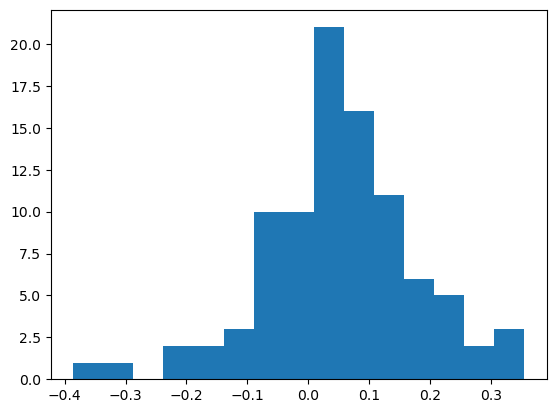

In [36]:
plt.hist(difference, bins=15);

In [37]:
def test():
    d0 = 0
    d = difference.mean()
    sd = difference.std(ddof=1)
    se = sd / sqrt(len(difference))
    tscore = (d - d0) / se
    df = len(difference) - 1
    pval = 2 * (1-t.cdf(tscore, df))
    print(f"P-value: {pval:.2e}")

test()

P-value: 1.45e-04


In [38]:
def interval(alpha):
    d = difference.mean()
    sd = difference.std(ddof=1)
    se = sd / sqrt(len(difference))
    df = len(difference) - 1
    crit = t.ppf(1 - alpha/2, df)
    me = crit * se
    print(f"{100-alpha*100}% CI: ({d-me:.6f}, {d+me:.6f})")

interval(0.05)

95.0% CI: (0.027057, 0.081345)
